# Telco Churn Presentation
### Corey Solitaire
#### 09.23.2020

<div class="alert alert-block alert-warning"></div>

# Planning

- **The goal:** of this stage is to clearly define your goal(s), measures of success, and plans on how to achieve that.

- **The deliverable:** is documentation of your goal, your measure of success, and how you plan on getting there. If you haven't clearly defined success, you will not know when you have achieved it.

<div class="alert alert-block alert-warning"></div>

## Goals:

1. Verify the primary factors that drive churn with statistical testing 


2. Incorporate factors in to a churn prediction model


3. Provide recommendations for churn reduction


4. Produce CSV with customer ID and model prediction

## Background:

From http://www.dbmarketing.com/telecom/churnreduction.html, by Authur Hughes

- As of 9/20/2020 annual churn rates for telecommunications companies average between 10 and 67 percent.


- Roughly 75 percent of the subscribers signing up with a new carrier every year are coming from another wireless provider and hence are already churners.


- Industry retention surveys have shown that while price and product are important, most people leave any service because of dissatisfaction with the way they are treated.


## Outline:

### **acquire.py**
 
 - **get**_telco_data()
   - Acquire data from MySQL telco_churn database hosted by codeup.com

### **prepare.py**

- prep_telco_data_**explore** (Prepared data used for exploration)
   - Columns dropped, columns added, columns expanded, column formatts modified
   
   
 - prep_telco_data_**model** (Split and scaled data used for modeling)
   - Same data but scaled for modeling

### **Explore**

- Summerize Data / Plot distributions


- Hypothesis testing and evaluation

### **Model**

- Develop models: logistic regression, decision tree, random forest, knn and test features


- Train, evaluate, test


### **Conclusion**

- Summary


- Recomendation(s)

### **Next Steps**

- What went right and wrong


- What would you do differently next time


- New questions to ask

## Data Dictionary:

- **Churn Rate (Churn):** The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity.

- **Heatmap:** A representation of data in the form of a map or diagram in which correlation values are represented as colors.

- **Correlation:** The interdependence of variable quantities.

- **Hypothesis Testing:** An act in statistics whereby an analyst tests an assumption regarding a population parameter.

- **Null Hypothesis:** A type of hypothesis used in statistics that proposes that there is no difference between certain characteristics of a population.

- **Alternative Hypothesis:** A type of hypothesis used in hypothesis testing that is contrary to the null hypothesis.

- **DSL:** "Digital Subscriber Line" DSL is a communications medium used to transfer digital signals over standard telephone lines.

- **Fiber:** Fiber optic cable is a high-speed data transmission medium. It contains tiny glass or plastic filaments that carry light beams. 

- **Chi Squared Test for Independence:** A statical test that ompares two variables in a contingency table to see if they are related.

- **P-value:** A p value is used in hypothesis testing to help you support or reject the null hypothesis. The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

- **Model Fitting (fit):** A process that involves running an algorithm on data for which the target variable (“labeled” data) is known to produce a machine learning model.

- **Algorithm:** A process or set of rules to be followed in calculations or other problem-solving operations, especially by a computer.   

- **Machine Learning Model:** A machine learning model is a file that has been trained (using an algorithm) to recognize certain types of patterns.

- **Logistic Regression Algorithm:** A classification algorithm, used when the value of the target variable is categorical in nature.

- **Decision Tree Algorithm:** A tree-structured classification algorithm, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

- **Random Forrest Algorithm:** A classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

- **KNN Algorithm:** A simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.

- **Classification Report:** Used to measure the quality of predictions from a classification algorithm. The report shows the main classification metrics precision, recall and f1-score on a per-class basis.

- **Confusion Matrix:** A table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

- **Accuracy:** The ratio of number of correct predictions to the total number of input samples.

- **Precision:** The number of correct positive results divided by the number of positive results predicted by the classifier.

- **Recall:** The number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).

- **f1-score:** The harmonic mean between precision and recall.

- **CSV:** A CSV (comma-separated values) file is a text file that has a specific format which allows data to be saved in a table structured format.

## Initial Hypothesis:

### 1. Customers with internet service are more likely to churn 

### 2. Customers with internet service and tech support are less likely to churn

<div class="alert alert-block alert-warning"></div>

# Data Acqusition: What does the telco_churn data look like?

 - **The goal:** is to create a path from original data sources to the environment in which you will work with the data. You will gather data from sources in order to prepare and clean it in the next step.

- **The deliverable:** is a file, acquire.py, that contains the function(s) needed to reproduce the acquisition of data.

<div class="alert alert-block alert-warning"></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score

import warnings
warnings.filterwarnings("ignore")

from acquire import get_telco_data
from prepare import prep_telco_data_explore
from prepare import prep_telco_data_model

In [2]:
df = get_telco_data(cached = True)

In [3]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.4,No,1,Month-to-month,1,DSL,2,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,4,69.4,571.45,No,1,Month-to-month,1,DSL,4,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,1,48.2,340.35,No,1,Month-to-month,1,DSL,1,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1,25.1,25.1,Yes,1,Month-to-month,1,DSL,1,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,3,30.5,30.5,Yes,1,Month-to-month,1,DSL,3,Bank transfer (automatic)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [5]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id,internet_service_type_id,payment_type_id
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.690473,1.872923,2.315633
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,0.833755,0.737796,1.148907
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,2.000000,3.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


In [6]:
df.isnull().sum()

customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
internet_service_type_id    0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
contract_type_id            0
paperless_billing           0
payment_type_id             0
monthly_charges             0
total_charges               0
churn                       0
contract_type_id            0
contract_type               0
internet_service_type_id    0
internet_service_type       0
payment_type_id             0
payment_type                0
dtype: int64

## Hypothesis Testing:

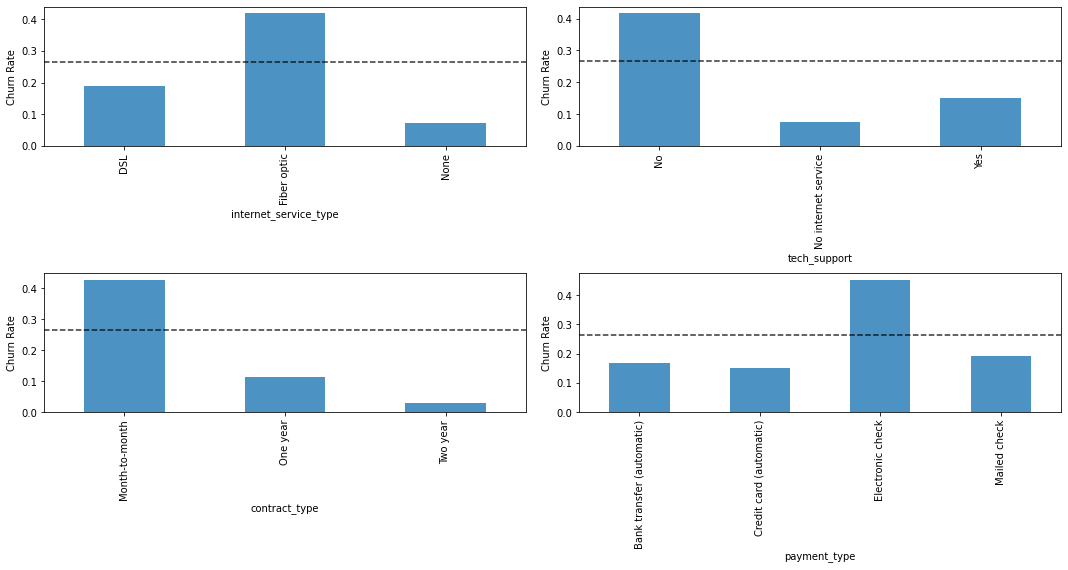

In [9]:
# Hypothesis Testing and Assumption Validation
plt.figure(figsize = (15,8))
plt.subplot(2, 2, 1)
df.groupby('internet_service_type').churn_cc.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)
plt.subplot(2, 2, 2)
df.groupby('tech_support').churn_cc.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)
plt.subplot(2, 2, 3)
df.groupby('contract_type').churn_cc.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)
plt.subplot(2, 2, 4)
df.groupby('payment_type').churn_cc.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)
plt.tight_layout(pad = 1.0)
plt.show()

## Hypothesis Testing Results:

1. Customers with internet service are more likely to churn
   - According to the data visualization customers with internet service are more likely to churn


2. Customers with internet service and tech support are less likely to churn
   - According to the data visulaization customers without tech support are more likley to churn

<div class="alert alert-block alert-warning"></div>

# Data Preparation: How will I manipulate the data to test my hypothesis?

- **The goal:** is to have data, split into 3 samples (train, validate, and test), in a format that can easily be explored, analyzed and visualized. The data is split so that we have a sample we can use to test our final model, one that was not used in the exploration of the data or the development of the model. This helps us understand the generality of the model.

- **The deliverable:** is a file, prep.py, that contains the function(s) needed to reproduce the preparation of the data. The resulting dataframes should be 3 samples, a dataframe for training the algorithms, a dataframe for validating the models developed on unseen data, a dataframe for testing the best performing model to ensure the model is able to be generalized on a final set of unseen data not 'overfitting' train, a validate and a test, roughly a 70%:20%:10% split (or somewhere between that and 50%:30%:20% ... depends on amount of data available). 

<div class="alert alert-block alert-warning"></div>

## Importing the prepared data

In [62]:
df_explore= prep_telco_data_explore(get_telco_data(cached = True))

In [11]:
# All categorical variables have a duplicate column filled with 1 or 0 for exploration
# Creation of new feature tenure_years
df_explore.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,mail_check,month_to_month_contract,one_year_contract,two_year_contract,internet_service_type_cc,internet_service,dsl,fiber_optic,None,tenure_years
0,0003-MKNFE,Male,0,0,0,9,1,Yes,No,No,...,1,1,0,0,0,1,1,0,0,0.75
1,0013-MHZWF,Female,0,0,1,9,1,No,No,No,...,0,1,0,0,0,1,1,0,0,0.75
2,0015-UOCOJ,Female,1,0,0,7,1,No,Yes,No,...,0,1,0,0,0,1,1,0,0,0.58
3,0023-HGHWL,Male,1,0,0,1,0,No phone service,No,No,...,0,1,0,0,0,1,1,0,0,0.08
4,0032-PGELS,Female,0,1,1,1,0,No phone service,Yes,No,...,0,1,0,0,0,1,1,0,0,0.08


In [63]:
# Changes between acquire and prepare
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   int64  
 4   dependents                7043 non-null   int64  
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   int64  
 7   multiple_lines            7043 non-null   object 
 8   online_security           7043 non-null   object 
 9   online_backup             7043 non-null   object 
 10  device_protection         7043 non-null   object 
 11  tech_support              7043 non-null   object 
 12  streaming_tv              7043 non-null   object 
 13  streaming_movies          7043 non-null   object 
 14  paperles

## Changes between original dataframe and prepared dataframe

1. Deleted redundent columns: contract_type_id, internet_service_type_id, payment_type_id


2. Replaced partner, dependents, churn, phone_service, paperless billing, with boolean value


3. Changed gender, payment_type, multiple_lines, online_security, online_backkup, device_protection, tech_support, streaming_tv, streaming_movies, contract_type, internet_service_type to categorical category codes


4. Added dummy variables as new columns in dataframe and rename them for payment_type, contract_type, internet_service_type


5. Created new boolean column for internet_service


6. Changed total_charges to a numeric variable (adds 18 Nan values)


7. Replace Nan in total_charges with 0 representing no total charge to date. 


8. Created a new feature called tenure_years

<div class="alert alert-block alert-warning"></div>

# Data Exploration: What does the data tell me?

- **The goal:** is to discover features that have the largest impact on the target variable, i.e. provide the most information gain, drive the outcome.

- **The deliverable:** is a file, preprocess.py, that contains the function(s) needed to reproduce the pre-processing of the data. The dataframe resulting from these functions should be one that is pre-processed, i.e. ready to be used in modeling. This means that attributes are reduced to features, features are in a numeric form, there are no missing values, and continuous and/or ordered values are scaled to be unitless.

<div class="alert alert-block alert-warning"></div>

# Estabolishing a Baseline

### - How am I going to define churn?

In [12]:
# First lets examine the origional data to estobolish a baseline

df = get_telco_data(cached = True)

### **If we look at all of the data (72 months or 6 years) we can see a relativly low rate of churn (26%)**

In [13]:
# Percent of Customers who Churned over 72 Months
df.churn.value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: churn, dtype: float64

### **The story changes if you look at the data by month, infact churn is > 50% for the first 8 months of service**

In [14]:
# Churn is greater then 50 % for first 8 months of service
df = get_telco_data(cached = True)
month_one = df.tenure <= 8
test = df[month_one]
test.churn.value_counts(normalize = True)

Yes    0.505476
No     0.494524
Name: churn, dtype: float64

### **Similar patterns exist when churn is examined annually.  At the end of year one churn is still relativly high (47%) and drops off after one year of service**

In [15]:
# Year One
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = df.tenure_years <= 1
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.525618
Yes    0.474382
Name: churn, dtype: float64

In [16]:
# Year two
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 2) & (df.tenure_years >=1)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.857143
Yes    0.142857
Name: churn, dtype: float64

In [17]:
# Year three
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 3) & (df.tenure_years >=2)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.879384
Yes    0.120616
Name: churn, dtype: float64

In [18]:
# Year four
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 4) & (df.tenure_years >=3)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.903604
Yes    0.096396
Name: churn, dtype: float64

In [19]:
# Year Five
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 5) & (df.tenure_years >=4)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.933243
Yes    0.066757
Name: churn, dtype: float64

In [20]:
# Year Six
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 6) & (df.tenure_years >=5)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.983425
Yes    0.016575
Name: churn, dtype: float64

## Thoughts: 
### - For my models the dummy assessment of churn will be **50%**. This is greater then the overall churn for the data set, but equivilent to the amount of churn seen in the first 8 months of service when customer identification and intervention are greatest

<div class="alert alert-block alert-warning"></div>

# Statistical Testing

1. Customers with internet service are more likely to churn
   - According to the data visualization customers with internet service are more likely to churn


2. Customers with internet service and tech support are less likely to churn
   - According to the data visulaization customers without tech support are more likley to churn
   
#### **However is this relationship statistically significant?  The only way to know is to test!

## Hypothesis Test One: Chi Squared Test For Independence

- Churn is dependent on internet service type (DSL vs Fiber)

**Null Hypothesis:
$H_{0}$: Whether a person churns is independent of internet service type**

**Alternative Hypothesis:
$H_{a}$: Whether a person churns is not independent of internet service type**

In [21]:
# 1. Set alpha, how confident you want to be in the relationship between your variables
confidence_level = .95
alpha = round(1 - confidence_level,2)
alpha

0.05

In [22]:
# 2. Sort data frame and remove "None" from internet_service_type

dsl_fiber = df_explore.internet_service_type != 'None'
df_dsl_fiber = df_explore[dsl_fiber]

In [23]:
# 3. Create a crosstab to aggregate data

ctab = pd.crosstab(df_dsl_fiber.churn, df_dsl_fiber.internet_service_type)
ctab

internet_service_type,DSL,Fiber optic
churn,,
0,1962,1799
1,459,1297


In [24]:
# 4. Preform Statistical Test, return P-value

Chi2, p, degf, expected = stats.chi2_contingency(ctab)
print(f'Our p-value is {p}.')
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is 2.2962170975696955e-73.
Our p-value is less than our alpha: True


## Findings:
**P-value is less than alpha so we reject the null hypothesis, ie. Our x^2 test informs us that the two categories, churn and internet service, are not independent.**

## Hypothesis Test Two: Chi Squared Test for Independence
- Churn is dependent on tech support (tech support, no tech support)

**Null Hypothesis:
$H_{0}$: Whether a person churns is independent of tech support**

**Alternate Hypothesis:
$H_{a}$: Whether a person churns is not independent of tech support**

In [25]:
# 1. Set alpha, how confident you want to be in the relationship between your variables

confidence_level = .95
alpha = round(1 - confidence_level,2)
alpha

0.05

In [26]:
# 2. Sort dataframe and remove'no internet service' from tech_support

df_support = df_explore.tech_support != 'No internet service'
df_support_final = df_explore[df_support]

In [27]:
# 3. Create a crosstab to aggregate data

ctab = pd.crosstab(df_support_final.churn, df_support_final.tech_support)
ctab

tech_support,No,Yes
churn,,
0,2027,1734
1,1446,310


In [28]:
# 4. Preform Statistical Test, return P-value

Chi2, p, degf, expected = stats.chi2_contingency(ctab)
print(f'Our p-value is {p}.')
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is 4.35191667899426e-92.
Our p-value is less than our alpha: True


## Findings:
**P-value is less than alpha so we reject the null hypothesis, ie. Our x^2 test informs us that the two categories, churn and tech support, are not independent.**

## Statistical Test Summary

- Hypothesis Test One: With 95% accuracy we can state that churn is dependent on the type of internet service customers choose

  - we are **not** implying that they are the **only** factors simply that they affect churn at TELCO


- Hypothesis Test Two: With 95% accuracy we can state that churn is dependent on wheither or not a customer utilizes tech support

  - we are **not** implying that they are the **only** factors simply that they affect churn at TELCO
  
  
- **These two factors will defintaly be included in the model that we use to predict churn!**

<div class="alert alert-block alert-warning"></div>

# Identifying Churn Drivers:

- **What Factors Have the Largest Impact on the Target Variable** 

 - Explore correlations with heatmaps (4 variables at a time)
 - Cross reference at conclusion using df_explore.corr()

In [29]:
# Cleaned Data for Exploration
df_explore= prep_telco_data_explore(get_telco_data(cached = True))

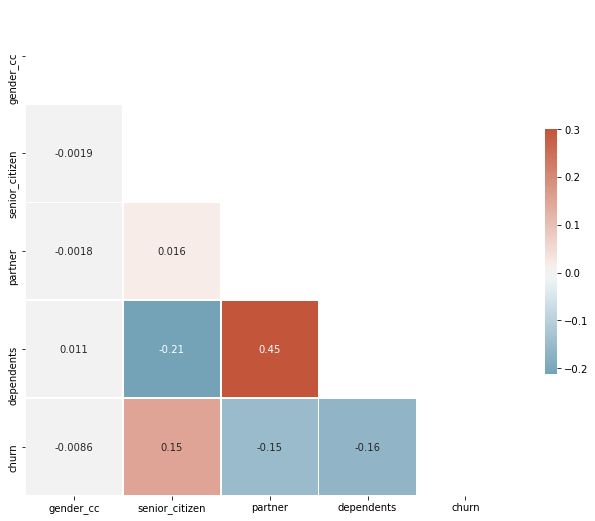

In [30]:
# Identify features to explore (Part One)
explore_heatmat = df_explore[['gender_cc', 'senior_citizen', 'partner', 'dependents', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Takeaway:

  - gender = Not a churn driver
  - senior_citizen = 0.15 +
  - partner = 0.15 -
  - dependents = 0.16 -

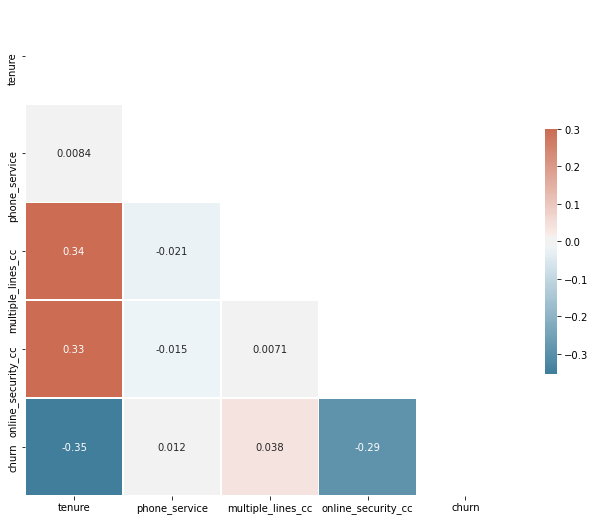

In [31]:
# Identify features to explore (Part Two)
explore_heatmat = df_explore[['tenure', 'phone_service', 'multiple_lines_cc', 'online_security_cc', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Takeaway:
- tenure = 0.35 -
- phone_service = Not a churn driver
- multiple lines = Not a churn driver
- online_security = 0.29 -

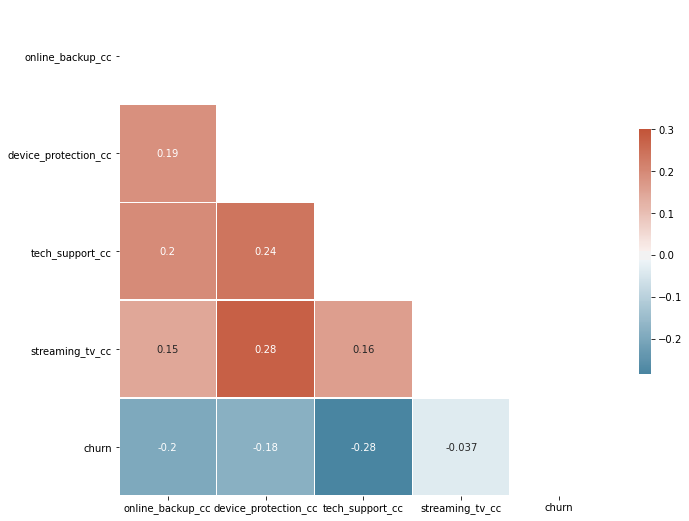

In [32]:
# Identify features to explore (Part Three)
explore_heatmat = df_explore[['online_backup_cc', 'device_protection_cc', 'tech_support_cc', 'streaming_tv_cc', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Takeaway:
- online_backup = 0.20 -
- device_protection = .18 -
- tech_support = .28 -
- streaming_tv = Not a churn driver

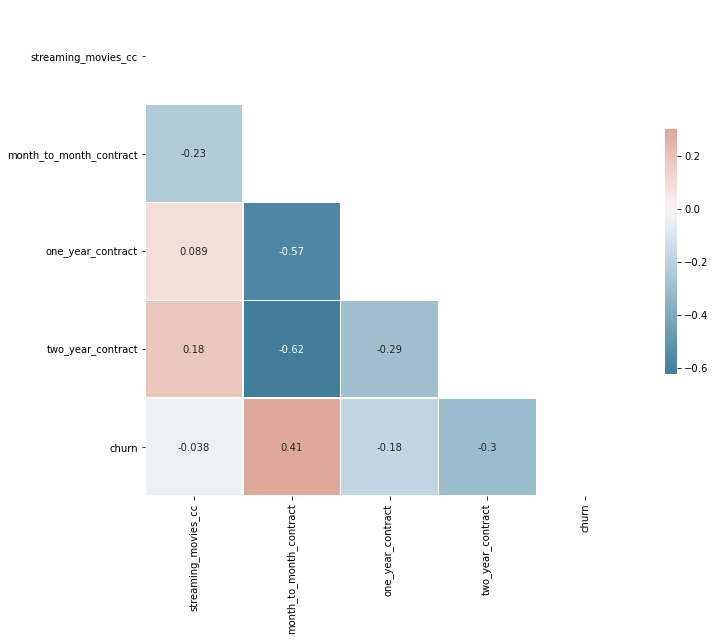

In [33]:
# Identify features to explore (Part Four)
explore_heatmat = df_explore[['streaming_movies_cc', 'month_to_month_contract', 'one_year_contract', 'two_year_contract', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Takeaway:
- streaming_movies = Not a churn driver
- month_to_month_contract = 0.41 +
- one_year_contract = 0.18 -
- two_year_contract = 0.30 -

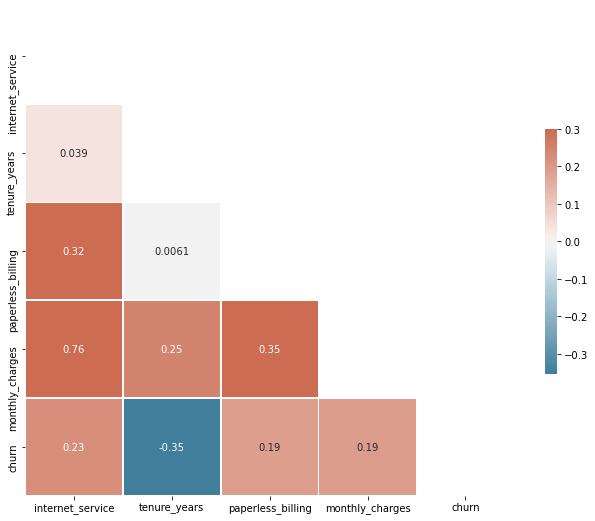

In [34]:
# Identify features to explore (Part Five)
explore_heatmat = df_explore[['internet_service', 'tenure_years', 'paperless_billing', 'monthly_charges','churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Takeaway:
- internet_service = 0.23 +
- tenure_years = 0.35 -
- paperless_billing = 0.19 +
- monthly_charges = 0.19 +

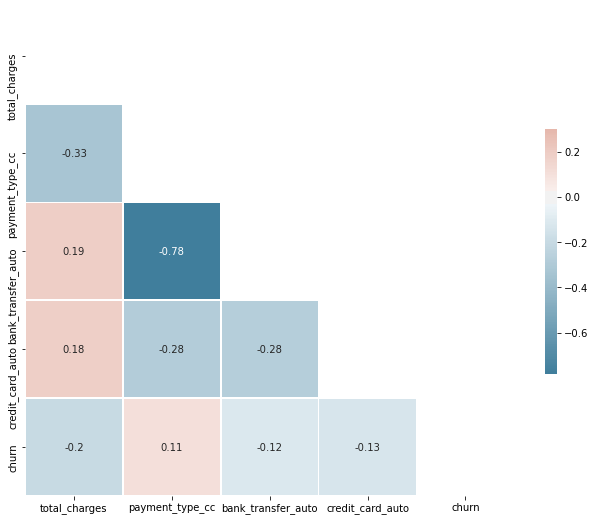

In [35]:
# Identify features to explore (Part Six)
explore_heatmat = df_explore[['total_charges', 'payment_type_cc', 'bank_transfer_auto', 'credit_card_auto','churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Takeaway:
- total_charges = 0.20 -
- payment_type = not a driver of churn
- bank_transfer = not a driver of churn
- credit_card = not a driver of churn

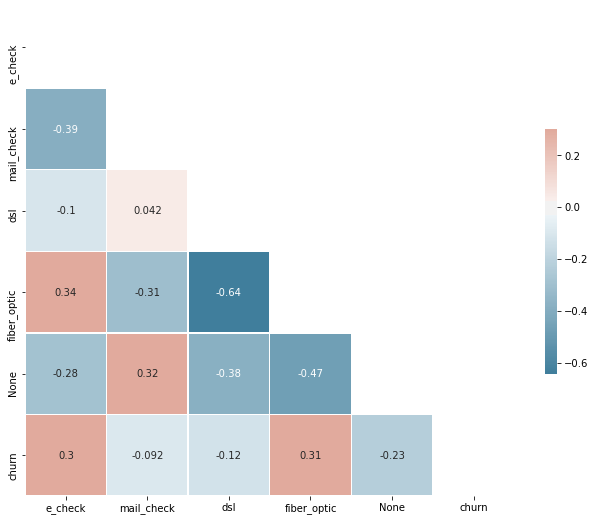

In [36]:
# Identify features to explore (Part Seven)
explore_heatmat = df_explore[['e_check','mail_check','dsl','fiber_optic','None','churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Takeaway so far...
- e_check = 0.30 +
- mail_check = not a driver of churn
- dsl = not a driver of churn
- fiber_optic = 0.31 +
- No interent = 0.23 -

### Validate findings using .corr()

In [37]:
# Cross Reference Correlations
df_explore.corr().iloc[8]

senior_citizen              0.150889
partner                    -0.150448
dependents                 -0.164221
tenure                     -0.352229
phone_service               0.011942
paperless_billing           0.191825
monthly_charges             0.193356
total_charges              -0.198324
churn                       1.000000
gender_cc                  -0.008612
payment_type_cc             0.107062
multiple_lines_cc           0.038037
online_security_cc         -0.289309
online_backup_cc           -0.195525
device_protection_cc       -0.178134
tech_support_cc            -0.282492
streaming_tv_cc            -0.036581
streaming_movies_cc        -0.038492
contract_type_cc           -0.396713
bank_transfer_auto         -0.117937
credit_card_auto           -0.134302
e_check                     0.301919
mail_check                 -0.091683
month_to_month_contract     0.405103
one_year_contract          -0.177820
two_year_contract          -0.302253
internet_service_type_cc   -0.047291
i

### Major Postive and Negative Drivers of Churn

### 7 Positive Drivers of Churn (<.15)
- senior_citizen = 0.15 +
- month_to_month_contract = .41 +
- internet_service = 0.23 +
- paperless_billing = 0.19 +
- monthly_charges = 0.19 +
- e_check = 0.30 +
- fiber_optic = 0.31 +

### 12 Negative Drivers of Churn (<.15)
- partner = 0.15 -
- dependents = 0.16 -
- tenure = 0.35 -
- online_security = 0.29 -
- online_backup = 0.20 -
- device_protection = .18 -
- tech_support = .28 -
- one_year_contract = .18 -
- two_year_contract = 0.30 -
- tenure_years = 0.35 -
- total_charges = 0.20 -
- No interent = 0.23 -

## 3 Big Takeaways

#### **1. Contract Type, Fiber Optic Service, and Tenure are the 3 Largest Drives Churn (+ and -)**

#### **2. Statistical modeling and literature suggest best way to reduce chrun is with tech support**

#### **3. Expanding tech support services will help customer experience would be a great place to start when looking to reduce churn in the future**
 

<div class="alert alert-block alert-warning"></div>

# Modeling: Predicting Churn

- **The goal:** is to create a robust and generalizable model that is a mapping between features and a target outcome.

- **The deliverable:** is a file, model.py, that contains functions for training the model (fit), predicting the target on new data, and evaluating results.

<div class="alert alert-block alert-warning"></div>

## General Assumptions

#### - Baseline churn is 50%.  Greater than overall, but equivilent to chrurn observed months 1 - 8


#### - 7 Features are large (+) churn drivers and 12 Features are large (-) churn drivers


#### - I am going to build a **balanced model** that uses the top 5 positive and top 5 negative drivers of churn
       - month_to_month_contract
       - e_check
       - fiber_optic
       - internet_service
       - monthly_charges
       - tenure_years
       - dependents
       - tech_support
       - no_internet

#### - Optimize for **Recall**, to reduce costly type II errors (perdict customer does not churn but they do)

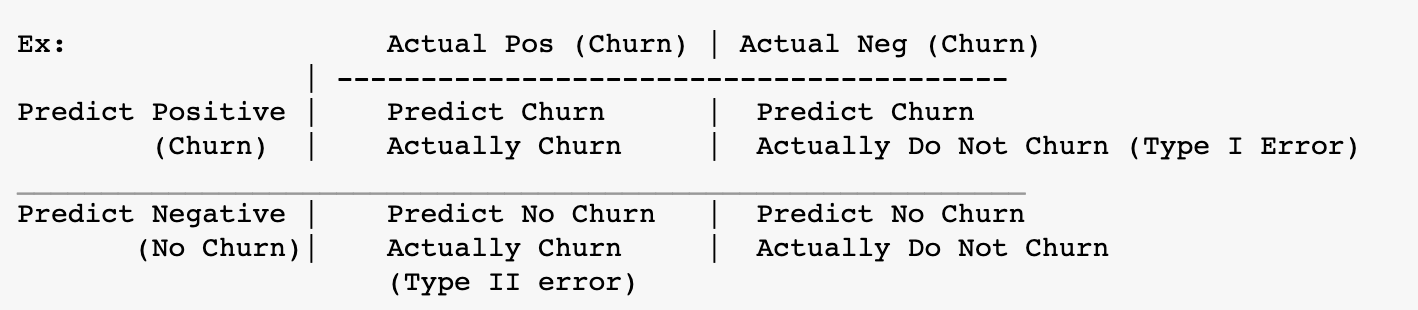

In [38]:
#Importing modeling data set (w/scaled values)
train, validate, test = prep_telco_data_model(get_telco_data(cached = True))

In [39]:
train.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,e_check,mail_check,month_to_month_contract,one_year_contract,two_year_contract,internet_service,dsl,fiber_optic,None,tenure_years
5670,2739-CCZMB,0,0,1,0.069444,1,0,0.020927,0.014048,0,...,0,0,1,0,0,0,0,0,1,0.070000
4152,8035-PWSEV,0,0,0,0.083333,1,1,0.707524,0.056081,0,...,1,0,1,0,0,1,0,1,0,0.083333
4890,6250-CGGUN,0,0,0,0.750000,1,0,0.659193,0.516310,0,...,1,0,0,1,0,1,0,1,0,0.750000
2391,9499-XPZXM,0,1,0,1.000000,1,0,0.463378,0.553237,0,...,0,0,0,0,1,1,1,0,0,1.000000
2896,2305-MRGLV,0,1,0,0.388889,1,0,0.580967,0.237818,0,...,0,0,1,0,0,1,0,1,0,0.388333


# Logistic Regression Model

In [40]:
# Logistic Model
train, validate, test = prep_telco_data_model(get_telco_data(cached = True))
X_train_1 = train[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
y_train = train.churn

# Log Function
log = LogisticRegression(C=1, random_state = 123, solver='lbfgs')
log.fit(X_train_1, y_train)

# make a prediction with traning data
y_pred_1 = log.predict(X_train_1)
# estimate prob of churn with training data
y_pred_proba_1 = log.predict_proba(X_train_1)

print('Accuracy of Logistic Classifier on training set: {:.2f}'
     .format(log.score(X_train_1, y_train)))
print(classification_report(y_train, y_pred_1))

Accuracy of Logistic Classifier on training set: 0.80
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2897
           1       0.65      0.51      0.57      1046

    accuracy                           0.80      3943
   macro avg       0.74      0.71      0.72      3943
weighted avg       0.79      0.80      0.79      3943



## Findings:

- 80% Accuracy no matter what adjustments were made to model parameters
- 51% Recall :(

# Decision Tree Model

In [41]:
# Decision Tree Model
train, validate, test = prep_telco_data_model(get_telco_data(cached = True))
X_train_2 = train[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
y_train = train.churn

# Decision Tree Function
clf = DecisionTreeClassifier(max_depth=10, random_state=123)
clf.fit(X_train_2, y_train)

#make a prediction with traning data
y_pred_2 = clf.predict(X_train_2)
#estimate prob of churn with training data
y_pred_proba_2 = clf.predict_proba(X_train_2)

print('Accuracy of Logistic Classifier on training set: {:.2f}'
     .format(clf.score(X_train_2, y_train)))
print(classification_report(y_train, y_pred_2))

Accuracy of Logistic Classifier on training set: 0.88
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2897
           1       0.80      0.74      0.77      1046

    accuracy                           0.88      3943
   macro avg       0.85      0.84      0.84      3943
weighted avg       0.88      0.88      0.88      3943



## Findings:
- with max_depth of 3 equivlent accuracy(80%), worse recall for positive churn
- with max_depth of 10 better accuracy (88%), better recall and f1 score
- 74% Recall :)


# Random Forrest Model

In [42]:
# Random Forrest Model
train, validate, test = prep_telco_data_model(get_telco_data(cached = True))
X_train_3 = train[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
y_train = train.churn

# Random Forrest Function
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=10,
                            n_estimators=100,
                            max_depth=20, 
                            random_state=123)

rf.fit(X_train_3, y_train)

#make a prediction with traning data
y_pred_3 = rf.predict(X_train_3)
#estimate prob of churn with training data
y_pred_proba_3 = rf.predict_proba(X_train_3)

print('Accuracy of Logistic Classifier on training set: {:.2f}'
     .format(rf.score(X_train_3, y_train)))
print(classification_report(y_train, y_pred_3))

Accuracy of Logistic Classifier on training set: 0.83
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2897
           1       0.74      0.55      0.63      1046

    accuracy                           0.83      3943
   macro avg       0.80      0.74      0.76      3943
weighted avg       0.82      0.83      0.82      3943



## Findings
- No Matter how I fine tune the function it does not give me the f1 score I am looking for
- Accuray is ok (83%)
- 55% recall :(

# KNN Model

In [43]:
# KNN Model
train, validate, test = prep_telco_data_model(get_telco_data(cached = True))
X_train_4 = train[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
y_train = train.churn

# Random Forrest Function
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

knn.fit(X_train_4, y_train)

#make a prediction with traning data
y_pred_4 = knn.predict(X_train_4)
#estimate prob of churn with training data
y_pred_proba_4 = knn.predict_proba(X_train_4)

print('Accuracy of Logistic Classifier on training set: {:.2f}'
     .format(knn.score(X_train_4, y_train)))
print(classification_report(y_train, y_pred_4))

Accuracy of Logistic Classifier on training set: 0.84
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2897
           1       0.75      0.61      0.67      1046

    accuracy                           0.84      3943
   macro avg       0.81      0.77      0.78      3943
weighted avg       0.84      0.84      0.84      3943



## Findings:
- with n =5, good accuracy(.84) and f1 score (.67)
- 61% recall :|


<div class="alert alert-block alert-warning"></div>

## Validate Data: (Top 3 Models)

### - I chose to validate using the logistic, decision tree, and knn models because they provided me with the greatest overall values in accuracy and recall

In [44]:
# Train models on validate

X_validate_1 = validate[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
X_validate_2 = validate[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
X_validate_4 = validate[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
y_validate = validate.churn

#make a prediction with validate data
y_pred_1 = log.predict(X_validate_1)
y_pred_2 = clf.predict(X_validate_2)
y_pred_4 = knn.predict(X_validate_4)

#estimate prob of churn with training data
y_pred_proba_1 = log.predict_proba(X_validate_1)
y_pred_proba_2 = clf.predict_proba(X_validate_2)
y_pred_proba_4 = knn.predict_proba(X_validate_4)

In [45]:
# Logistic Model Preformance
print('Accuracy of Logistic Classifier on validate set: {:.2f}'
     .format(log.score(X_validate_1, y_validate)))
print(classification_report(y_validate, y_pred_1))

Accuracy of Logistic Classifier on validate set: 0.80
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1242
           1       0.67      0.52      0.59       449

    accuracy                           0.80      1691
   macro avg       0.76      0.71      0.73      1691
weighted avg       0.79      0.80      0.80      1691



In [46]:
# Decision Tree Preformance
print('Accuracy of Decision Tree Classifier on validate set: {:.2f}'
     .format(clf.score(X_validate_2, y_validate)))
print(classification_report(y_validate, y_pred_2))

Accuracy of Decision Tree Classifier on validate set: 0.77
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1242
           1       0.58      0.51      0.54       449

    accuracy                           0.77      1691
   macro avg       0.70      0.69      0.69      1691
weighted avg       0.76      0.77      0.77      1691



In [47]:
# KNN Preformance
print('Accuracy of KNN Classifier on validate set: {:.2f}'
     .format(knn.score(X_validate_4, y_validate)))
print(classification_report(y_validate, y_pred_4))

Accuracy of KNN Classifier on validate set: 0.78
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1242
           1       0.60      0.48      0.53       449

    accuracy                           0.78      1691
   macro avg       0.71      0.68      0.69      1691
weighted avg       0.76      0.78      0.77      1691



## Findings:
### - Logistic model had best overall accuray and recall (52%) on validate data.  Will use logistic model on test data

## Test Data: (Top Model)

In [48]:
# Test Data
X_test = test[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
y_test = test.churn


y_pred_test = log.predict(X_test)

print('Accuracy of Logistic Classifier on test set: {:.2f}'
     .format(log.score(X_test, y_test)))

Accuracy of Logistic Classifier on test set: 0.79


In [49]:
confusion = confusion_matrix(y_test, y_pred_test)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Classification Accuracy: Overall, how often is the classifier correct?

# use float to perform true division, not integer division
print("Classification Accuracy: Overall, how often is the classifier correct")
print((TP + TN) / float(TP + TN + FP + FN))

# Classification Error: Overall, how often is the classifier incorrect?

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Classification Error: Overall, how often is the classifier incorrect")
print(classification_error)

# Sensitivity: When the actual value is positive, how often is the prediction correct?

sensitivity = TP / float(FN + TP)
print("Sensitivity: When the actual value is positive, how often is the prediction correct")
print(sensitivity)

# Specificity: When the actual value is negative, how often is the prediction correct?

specificity = TN / (TN + FP)
print("Specificity: When the actual value is negative, how often is the prediction correct")
print(specificity)

# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

false_positive_rate = FP / float(TN + FP)
print("False Positive Rate: When the actual value is negative, how often is the prediction incorrect")
print(false_positive_rate)

# Precision: When a positive value is predicted, how often is the prediction correct?

precision = TP / float(TP + FP)
print("Precision: When a positive value is predicted, how often is the prediction correct")
print(precision)

print(classification_report(y_test, y_pred_test))

[[923 112]
 [185 189]]
Classification Accuracy: Overall, how often is the classifier correct
0.7892122072391767
Classification Error: Overall, how often is the classifier incorrect
0.21078779276082327
Sensitivity: When the actual value is positive, how often is the prediction correct
0.5053475935828877
Specificity: When the actual value is negative, how often is the prediction correct
0.8917874396135266
False Positive Rate: When the actual value is negative, how often is the prediction incorrect
0.10821256038647344
Precision: When a positive value is predicted, how often is the prediction correct
0.627906976744186
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [50]:
# False negative rate (Predict No Churn/ Churn)
FNR = FN/(TP+FN)
FNR

0.4946524064171123

<div class="alert alert-block alert-warning"></div>

# Delivery:

- **The goal:** is to enable others to use what you have learned or developed through all the previous stages.

- **The deliverable:** Summary, recomentaions, and CSV file with customer ID and model predictions:

<div class="alert alert-block alert-warning"></div>

# Summary

1. Identified 19 variables with  >=  0.15 correlation to churn


2. Statiscial testing (Chi Squared Test of Independence) was preformed on two variables of interest
   - internet_service_type and 
   - tech_support. 
   
   
3. The null hypothosis of (independence) was rejected for each variable providing insight in to model building


4. Machine learning models were constructed integrating top 10 correlated variables (5 + and 5 -)
   - logistic model 
   - decision tree
   - random forrest 
   - knn  


4. Models were evaluated against a baseline accuracy of 50% and optimized for Recall.  


5. After testing and validation a logistic model was selected, and when run on unseen test data provided a 20% increase in overall accuracy with a Recall score of 51%.  


6. This Recall score is not optimal because when the model makes costly type II errors 50% of the time. 

# Recommendations

- **Observations:** Churn is a problem, the top 3 drivers of churn at Telco
   - month to month contracts
   - e checks
   - fiber optic internet service
   
__________________________________________________________________________________________________________________   
   - **Recommendation One:** Increase outreach for tech support
     - The majority of customers who leave have internet service, specifically fiber optic service
     - Literature suggests better customer service leads to a reduction in churn
   
   
   - **Recommendation Two:** Have finance examine payment methods
     - Churn is high in customers who pay using e checks
     - Need more research on customer base, who they are and relationship between e-check and churn
     
     
   - **Recommendation Three:** Review month to month contracts
     - Churn rate is greater than 50% for first 8 months of service
     - Promotions or target marketing may create incentives to keep cutomer base

# Experimental Design Improvements / Questions for Further Exploration

1. By trying to build a balanced model (5 + and 5 - drivers) I may have negatvily affected my origional intent, a high recall score.  


2. Next Steps: A model with 10 values that only positivly correlated with churn may produce improved result


3. Questions to explore: Other positive customer interactions to collect and quantify (besides tech_support) to better understand relationship between churn and customer dissatisfcation

<div class="alert alert-block alert-warning"></div>

## Steps to Produce CSV with Customer ID and Predicted Churn

In [52]:
# Create eval_df and rename the train survived column target.
train, validate, test = prep_telco_data_model(get_telco_data(cached = True))
predict_churn_df = train[['churn']].rename(columns={'churn': 'target'}, inplace = True)

In [53]:
# this cell creates the best model
X_train = train[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]
y_train = train.churn

log = LogisticRegression(C=1, random_state = 123, solver='lbfgs')
log.fit(X_train, y_train)

# call in a complete data frame to test

X = df_explore[['month_to_month_contract','e_check', 'fiber_optic', 'internet_service', 'monthly_charges','tenure_years','tech_support_cc','dependents','total_charges','None']]

# model.predict(X) gives us predictions for the entire dataframe
df_explore['prediction'] = log.predict(X)

In [54]:
# Rename churn as target
df_explore.rename(columns={'churn':'target'}, inplace = True)

In [55]:
# Clean dataframe
df_explore.drop(columns = ['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'online_security', 'online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','monthly_charges','total_charges','contract_type','internet_service_type','payment_type','gender_cc','payment_type_cc','multiple_lines_cc','online_security_cc','online_backup_cc', 'device_protection', 'month_to_month_contract','one_year_contract', 'two_year_contract','internet_service_type_cc', 'internet_service', 'dsl', 'fiber_optic', 'None', 'tenure_years','device_protection_cc','tech_support_cc','streaming_tv_cc','streaming_movies_cc','contract_type_cc','bank_transfer_auto', 'credit_card_auto','e_check','mail_check'], inplace = True)

In [56]:
# Export to CVS file
df_explore.to_csv('predictions.csv')